In [25]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [150]:
# Change this path based on run directory
path = "/Volumes/GoogleDrive/My Drive/Lemay_lab/pipeline_stats/NovaSeq043"

df = pd.read_csv(os.path.join(path, "043_pipeline_libsize_million.tsv"), sep='\t', header=0)
dfm = pd.melt(df, col_level=0, 
              id_vars=['sampleID'], 
              value_vars=['unzip','bmtagger','trimmomatic','fastuniq','flash'], 
              var_name='Process', 
             value_name='Read count (million)')
dfm

,sampleID,Process,Read count (million)
0,5002,unzip,27.517378
1,5005,unzip,32.020513
2,5006,unzip,29.226983
3,5007,unzip,31.391864
4,5011,unzip,29.150206
...,...,...,...
475,8040,flash,7.203646
476,8041,flash,6.979801
477,8042,flash,15.226146
478,8048,flash,10.810835


In [49]:
def update_label(old_label, exponent_text):
    if exponent_text == "":
        return old_label
    
    try:
        units = old_label[old_label.index("[") + 1:old_label.rindex("]")]
    except ValueError:
        units = ""
    label = old_label.replace("[{}]".format(units), "")
    
    exponent_text = exponent_text.replace("\\times", "")
    
    return "{} [{} {}]".format(label, exponent_text, units)
    
def format_label_string_with_exponent(ax, axis='both'):  
    """ Format the label string with the exponent from the ScalarFormatter """
    ax.ticklabel_format(axis=axis, style='sci')

    axes_instances = []
    if axis in ['x', 'both']:
        axes_instances.append(ax.xaxis)
    if axis in ['y', 'both']:
        axes_instances.append(ax.yaxis)
    
    for ax in axes_instances:
        ax.major.formatter._useMathText = True
        plt.draw() # Update the text
        exponent_text = ax.get_offset_text().get_text()
        label = ax.get_label().get_text()
        ax.offsetText.set_visible(False)
        ax.set_label_text(update_label(label, exponent_text))

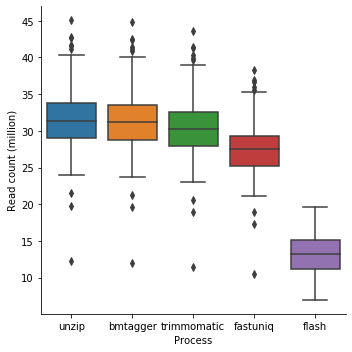

In [66]:
fig = sns.catplot(x="Process", y="Read count (million)", kind="box", data=dfm).set_titles("dd")
#plt.ticklabel_format(style='plain', axis='y')

# save the fig  
fig.savefig(os.path.join(path, "043_pipeline_libsize.pdf"),
            format='pdf') 

In [142]:
# histogram
import glob
path = "/Volumes/GoogleDrive/My Drive/Lemay_lab/pipeline_stats/NovaSeq072"

tabm = pd.DataFrame()

for file in glob.glob(os.path.join(path, "flash_hist/*.hist")):
    tab = pd.read_csv(file, sep='\t', names=['Merged read length','Read count'], header=None, engine='python')
    tab['sampleID'] = file[-9:-5] 
    try:
        tabm = pd.concat([tab, tabm],sort=False)
    except KeyError:
        tabm = tab.copy()
    tabm.to_csv(os.path.join(path,"flash_hist/merged.hist"), sep='\t')
    


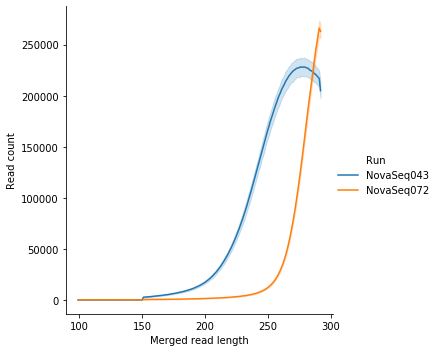

In [145]:
tabm043 = pd.read_csv(os.path.join("/Volumes/GoogleDrive/My Drive/Lemay_lab/pipeline_stats/NovaSeq043", "flash_hist/merged.hist"), sep='\t', header=0, index_col=0)
tabm072 = pd.read_csv(os.path.join("/Volumes/GoogleDrive/My Drive/Lemay_lab/pipeline_stats/NovaSeq072", "flash_hist/merged.hist"), sep='\t', header=0, index_col=0)

tabm043['Run'] = 'NovaSeq043'
tabm072['Run'] = 'NovaSeq072'

tabm2 = pd.concat([tabm043,tabm072],sort=False)
tabm2

sns.relplot(x="Merged read length", y="Read count", hue="Run", kind="line", data=tabm2).savefig(os.path.join("/Volumes/GoogleDrive/My Drive/Lemay_lab/pipeline_stats", "Run043_Run072_len_dist.pdf"),
            format='pdf') 

